In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN

from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [2]:
df = pd.read_csv('/content/apartments_for_rent_classified_10K 2.csv',sep=';', encoding='cp1252')

In [3]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


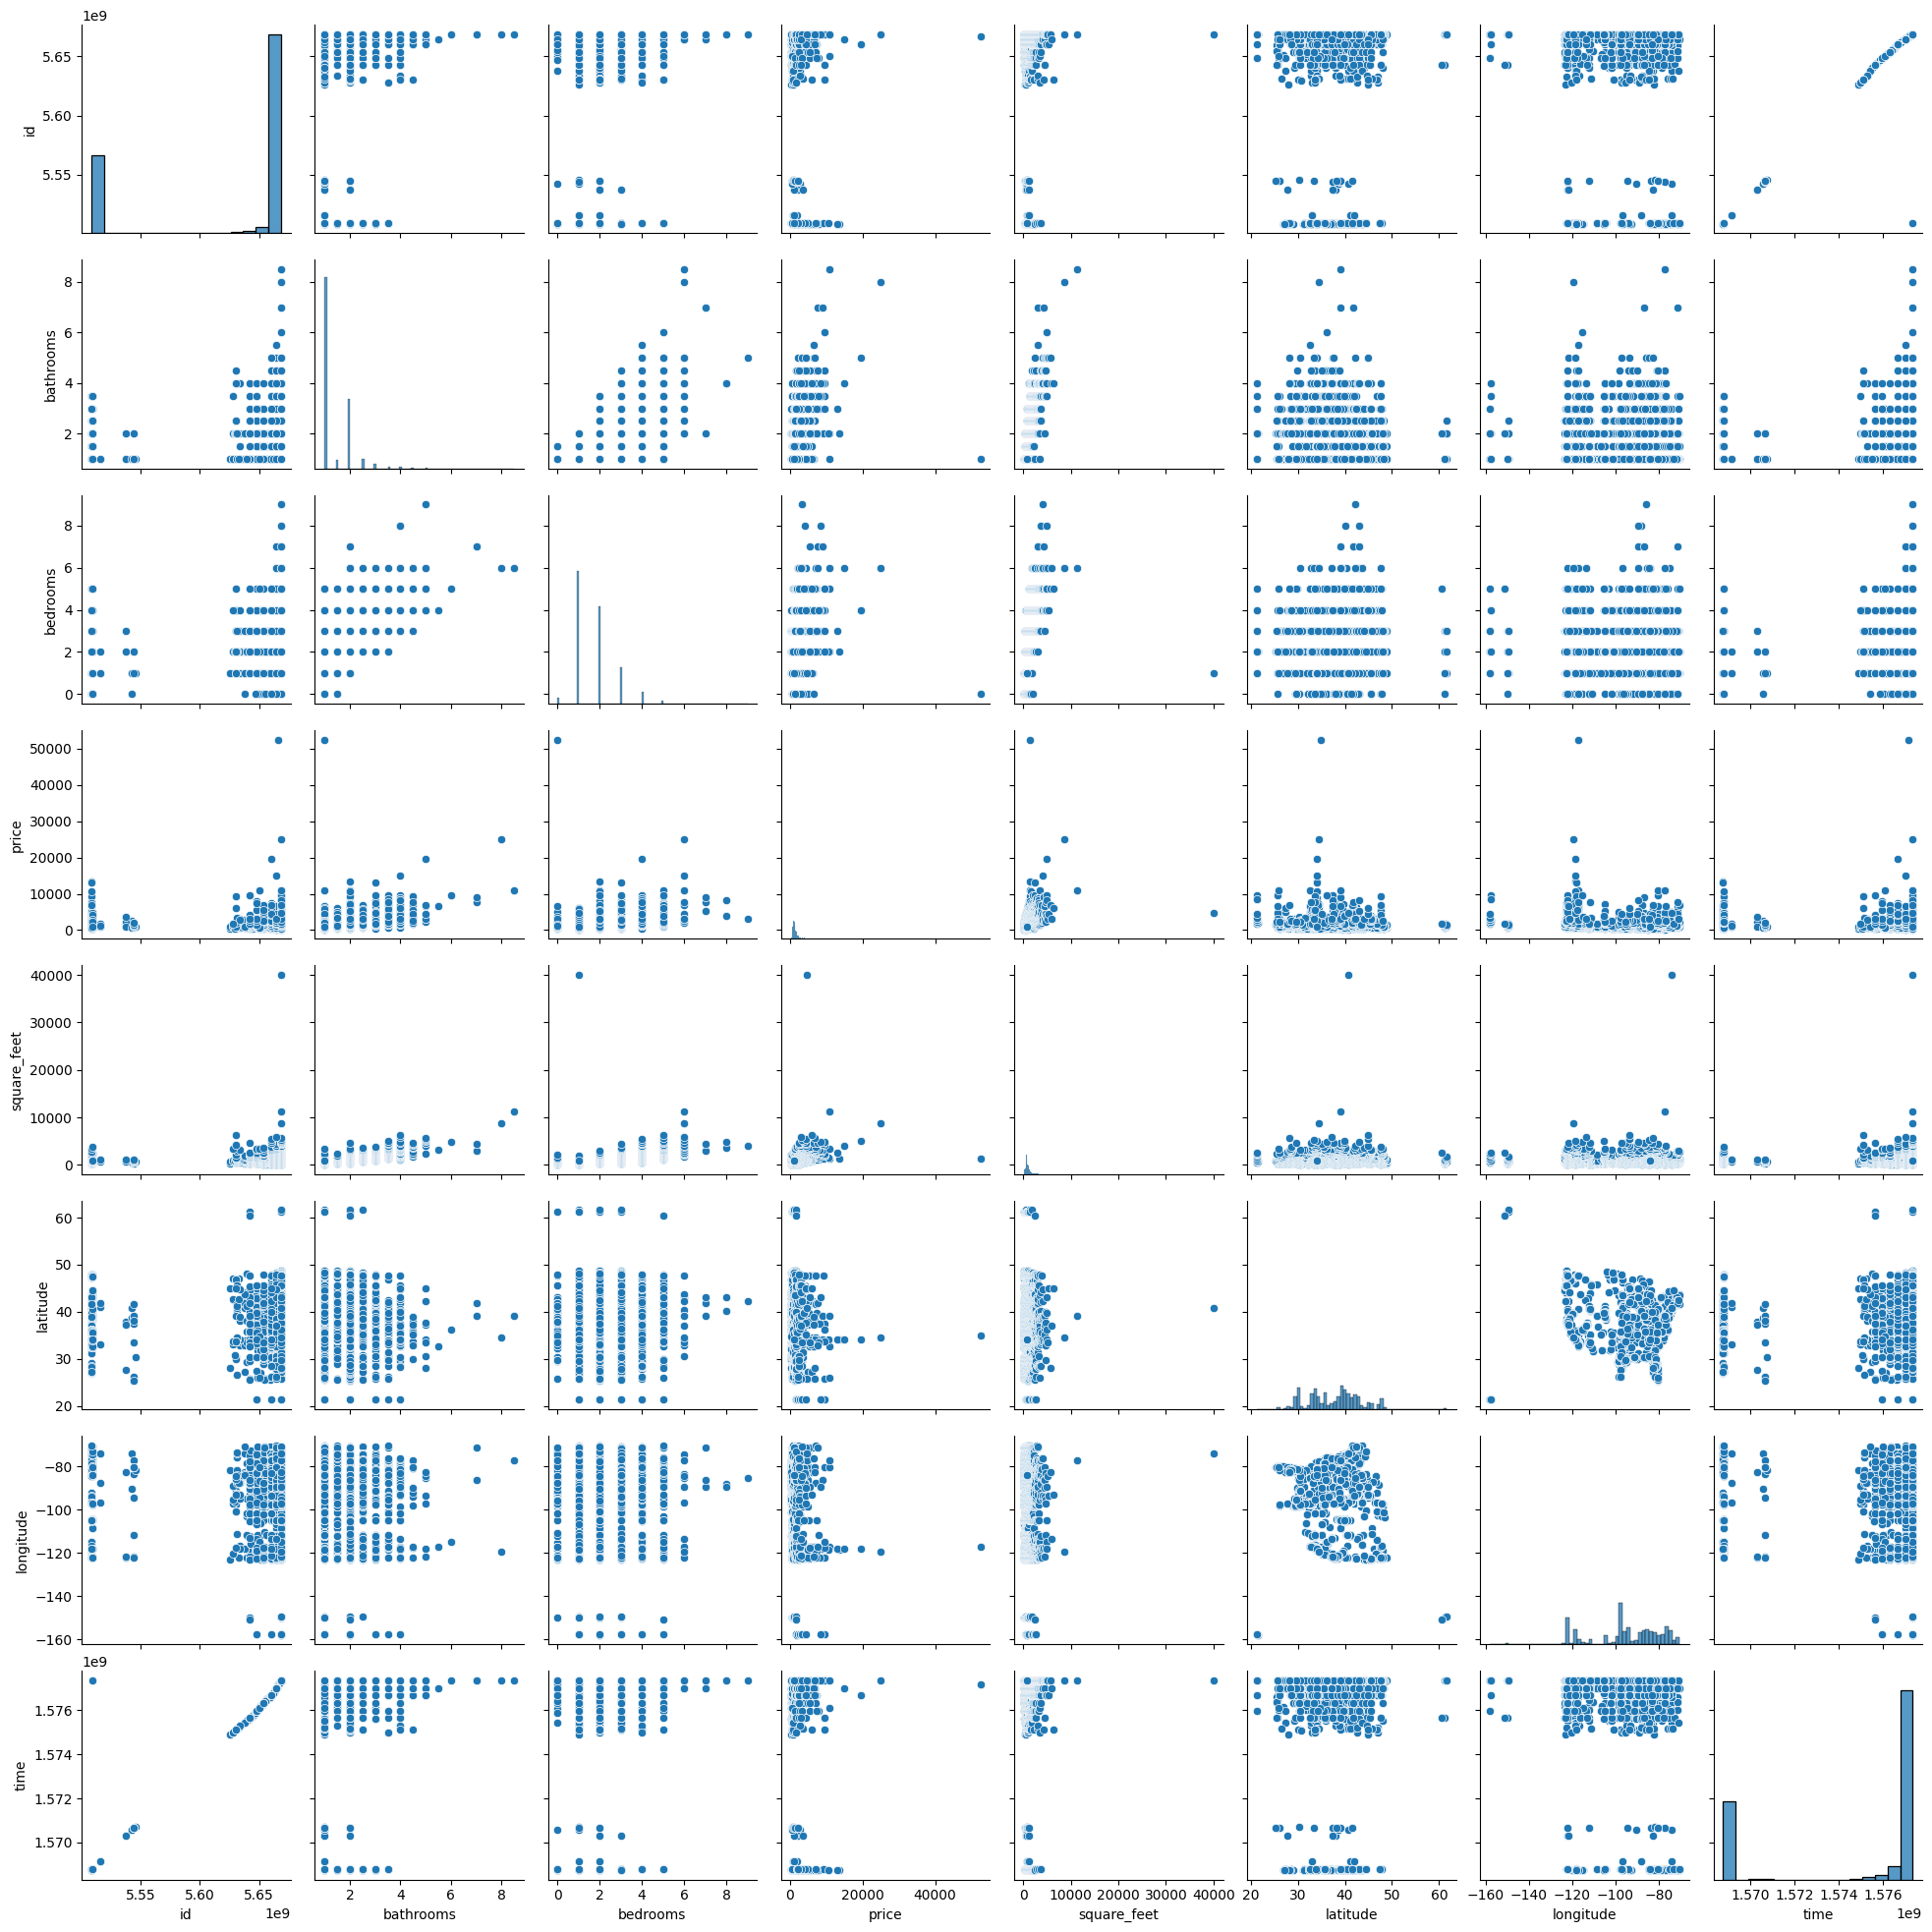

In [4]:
sns.pairplot(df)

In [ ]:
df.shape

(10000, 22)

In [ ]:
df.isna().sum()

,0
id,0
category,0
title,0
body,0
amenities,3549
bathrooms,34
bedrooms,7
currency,0
fee,0
has_photo,0


In [ ]:
col = ["latitude","longitude","price","square_feet"]

In [ ]:
dropped_df = df[col].dropna()

In [ ]:
dropped_df.shape

(9990, 4)

In [ ]:
scaler = StandardScaler()

In [ ]:
transform_df = scaler.fit_transform(dropped_df)

In [ ]:
scaled_df = pd.DataFrame(transform_df, columns=col)

In [ ]:
scaled_df.shape

(9990, 4)

In [ ]:
scaled_df.describe()

,latitude,longitude,price,square_feet
count,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03
mean,1.135161e-15,-5.718482e-16,4.552026e-17,9.104051e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-2.980518e+00,-4.021181e+00,-1.195001e+00,-1.288755e+00
25%,-7.306445e-01,-4.219459e-01,-4.994176e-01,-4.531351e-01
50%,2.028246e-01,6.349681e-02,-2.008461e-01,-2.183076e-01
75%,6.650146e-01,7.895336e-01,1.933797e-01,2.345739e-01
max,4.348741e+00,1.552168e+00,4.737510e+01,5.955138e+01


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [ ]:
clusters = kmeans.fit_predict(scaled_df)

In [ ]:
scaled_df['cluster'] = clusters
dropped_df['cluster'] = clusters

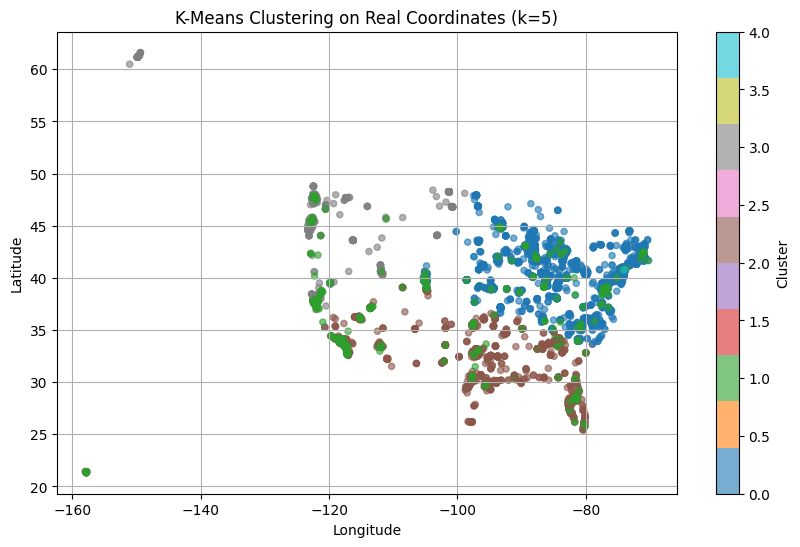

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    dropped_df['longitude'],
    dropped_df['latitude'],
    c=dropped_df['cluster'],
    cmap='tab10',
    alpha=0.6,
    s=20
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering on Real Coordinates (k=5)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
kmeans_8 = KMeans(n_clusters=8, random_state=42)

In [ ]:
cluster_8 = kmeans_8.fit_predict(scaled_df)

In [ ]:
dropped_df['cluster_8'] = cluster_8

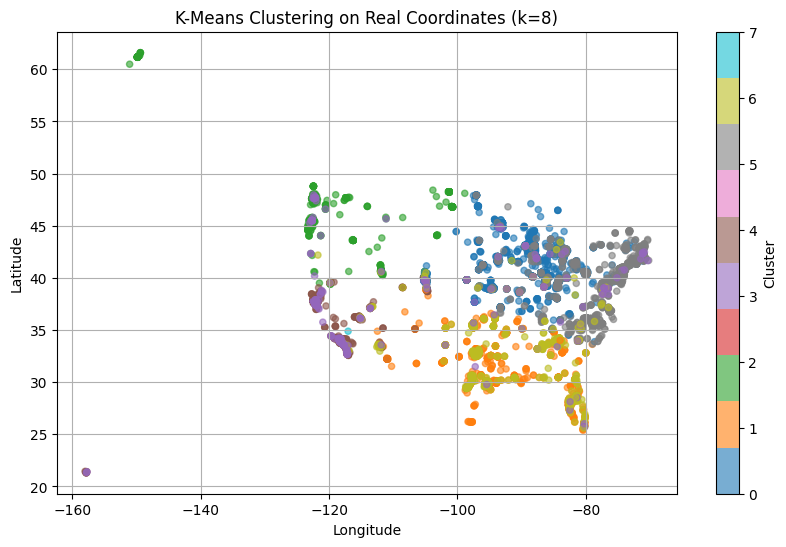

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    dropped_df['longitude'],
    dropped_df['latitude'],
    c=dropped_df['cluster_8'],
    cmap='tab10',
    alpha=0.6,
    s=20
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering on Real Coordinates (k=8)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
inertia_list = []
silhouette_scores = []
k_values = range(2, 11)
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(scaled_df)
  inertia_list.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))


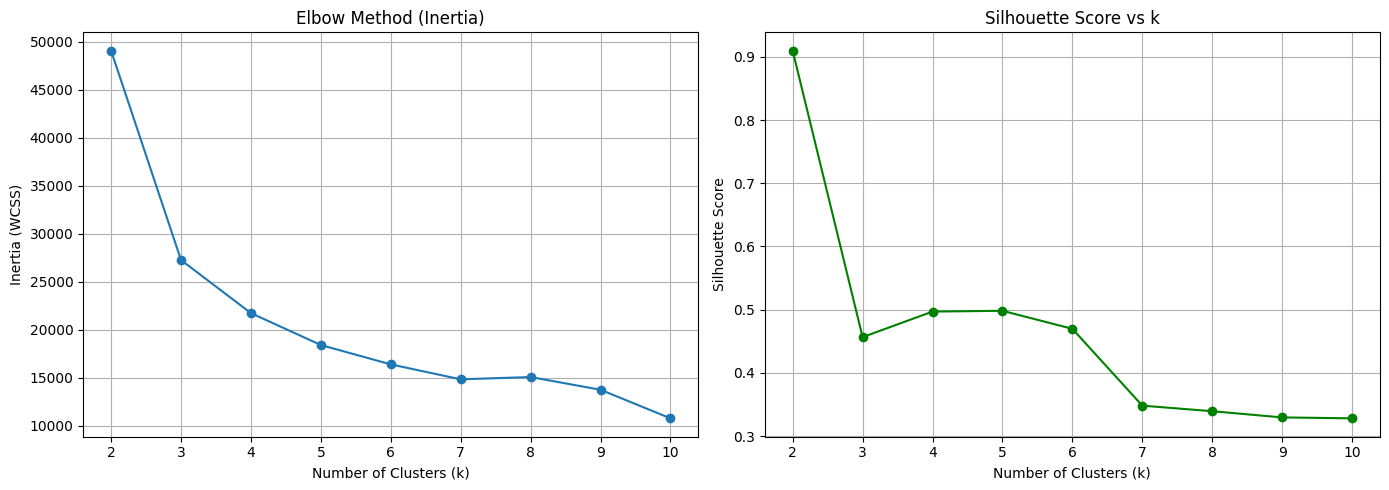

In [ ]:
# Plot Elbow Curve and Silhouette Scores
fig, axs = plt.subplots(1, 2, figsize=(14, 5))


# Elbow Method (WCSS)
axs[0].plot(k_values, inertia_list, marker='o')
axs[0].set_title('Elbow Method (Inertia)')
axs[0].set_xlabel('Number of Clusters (k)')
axs[0].set_ylabel('Inertia (WCSS)')
axs[0].grid(True)

# Silhouette Score
axs[1].plot(k_values, silhouette_scores, marker='o', color='green')
axs[1].set_title('Silhouette Score vs k')
axs[1].set_xlabel('Number of Clusters (k)')
axs[1].set_ylabel('Silhouette Score')
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
kmeans_5 = KMeans(n_clusters=5, random_state=42)

In [ ]:
clusters_5 = kmeans_5.fit_predict(scaled_df)

In [ ]:
dropped_df['cluster_5'] = clusters_5

<ipython-input-47-2304990196>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('Set1', 5),  # Limit the colormap to 5 clusters


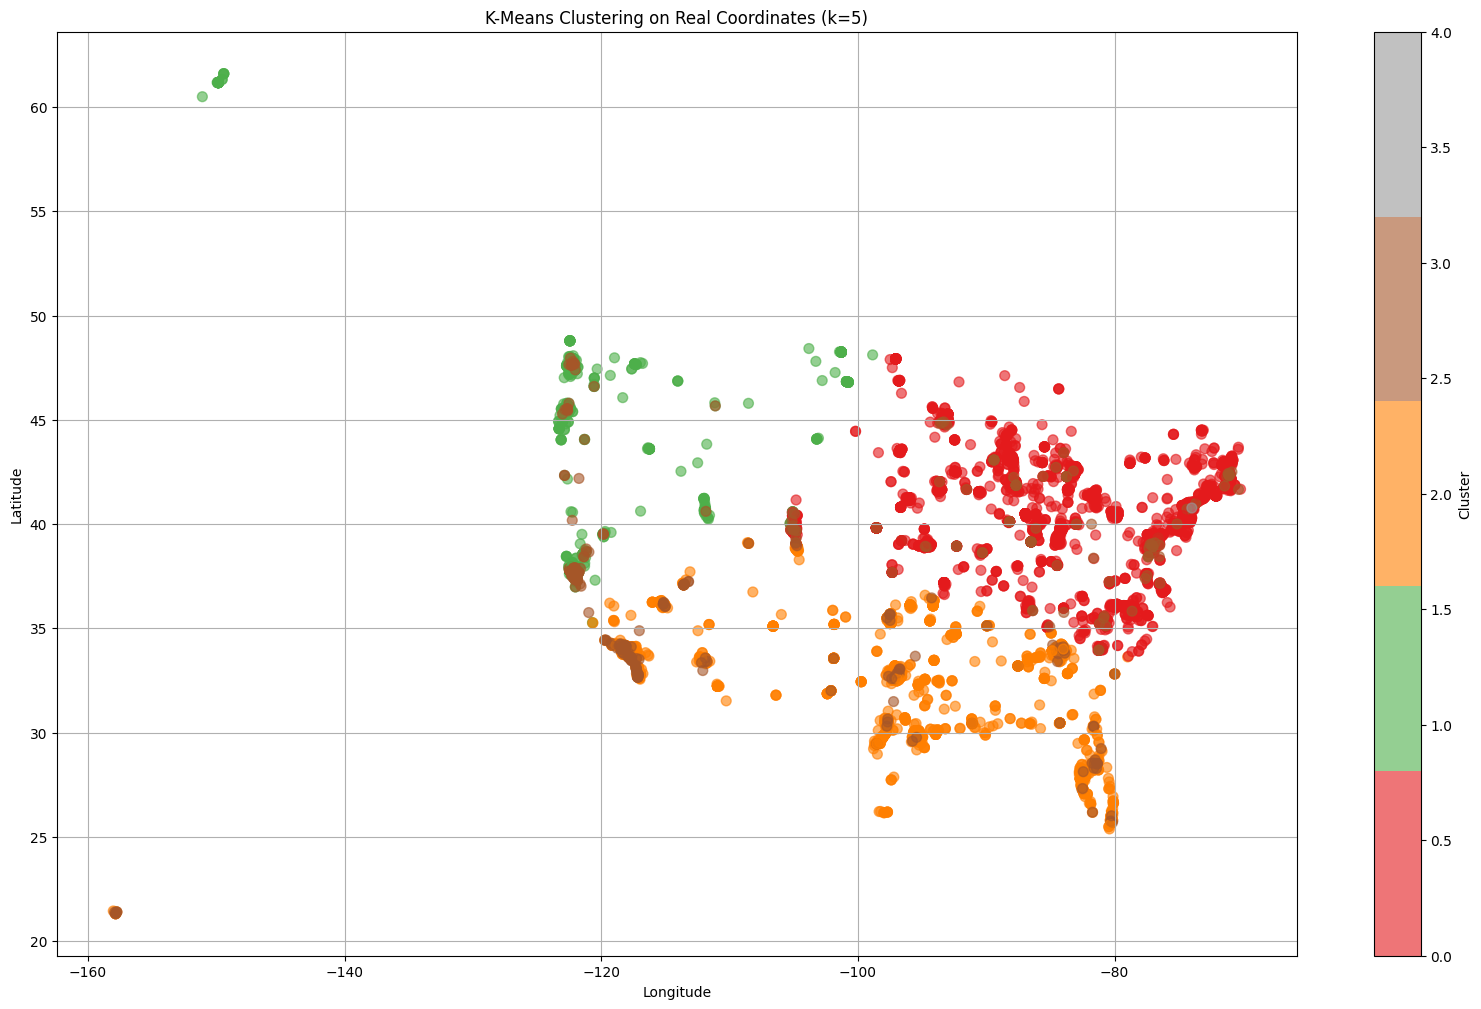

In [ ]:
custom_palette = sns.color_palette("Set1", 5)


plt.figure(figsize=(20, 12))
scatter = plt.scatter(
    dropped_df['longitude'],
    dropped_df['latitude'],
    c=dropped_df['cluster_5'],
    cmap=plt.cm.get_cmap('Set1', 5),  # Limit the colormap to 5 clusters
    alpha=0.6,
    s=50
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering on Real Coordinates (k=5)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
cluster_summary = dropped_df.groupby('cluster_5').agg({
    'price': ['mean','min','max','median'],
    'square_feet': ['mean','min','max','median']
}).reset_index()

In [ ]:
cluster_summary.columns = ['Cluster', 'Mean Price', 'Min Price', 'Max Price', 'Median Price', 'Mean Square Feet', 'Min Square Feet', 'Max Square Feet', 'Median Square Feet']

In [ ]:
cluster_summary

,Cluster,Mean Price,Min Price,Max Price,Median Price,Mean Square Feet,Min Square Feet,Max Square Feet,Median Square Feet
0,0,1315.600464,200,4124,1220.0,892.990713,101,2680,822.0
1,1,1672.835993,425,4200,1575.0,827.911348,116,2500,748.0
2,2,1287.917537,275,3699,1179.5,868.867510,132,2784,756.0
3,3,4210.975258,1365,52500,3695.0,2239.973196,600,11318,2100.0
4,4,4790.000000,4790,4790,4790.0,40000.000000,40000,40000,40000.0


In [ ]:
longlat = dropped_df.groupby('cluster_5').agg({'longitude':'mean','latitude':'mean'})

In [ ]:
def label_region(lat, lon):
    if lat > 35 and lon < -100:
        return "West Coast"
    elif lat > 35 and lon > -100 and lon < -80:
        return "Midwest"
    elif lat > 35 and lon > -80:
        return "Northeast"
    elif lat <= 35 and lon < -90:
        return "Southwest"
    else:
        return "Southeast"


In [ ]:
longlat["region"] = longlat.apply(lambda x: label_region(x['latitude'], x['longitude']), axis=1)

In [ ]:
cluster_summary["region"] = longlat.apply(lambda x: label_region(x['latitude'], x['longitude']), axis=1)

In [ ]:
cluster_summary

,Cluster,Mean Price,Min Price,Max Price,Median Price,Mean Square Feet,Min Square Feet,Max Square Feet,Median Square Feet,region
0,0,1315.600464,200,4124,1220.0,892.990713,101,2680,822.0,Midwest
1,1,1672.835993,425,4200,1575.0,827.911348,116,2500,748.0,West Coast
2,2,1287.917537,275,3699,1179.5,868.867510,132,2784,756.0,Southwest
3,3,4210.975258,1365,52500,3695.0,2239.973196,600,11318,2100.0,West Coast
4,4,4790.000000,4790,4790,4790.0,40000.000000,40000,40000,40000.0,Northeast


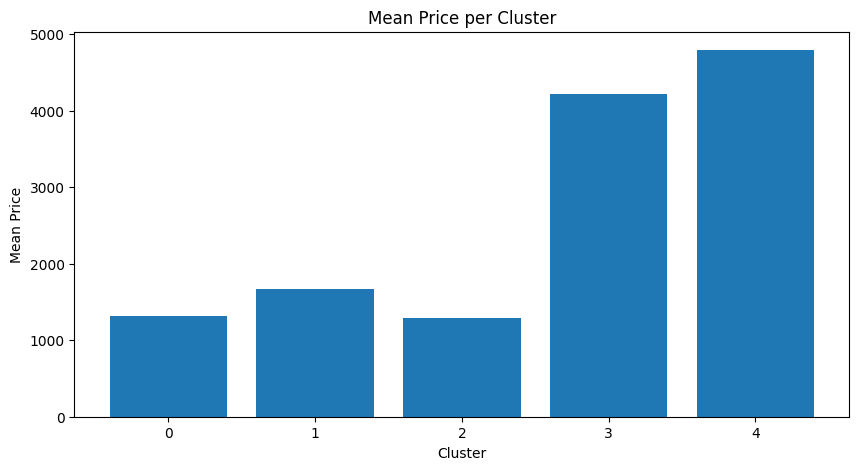

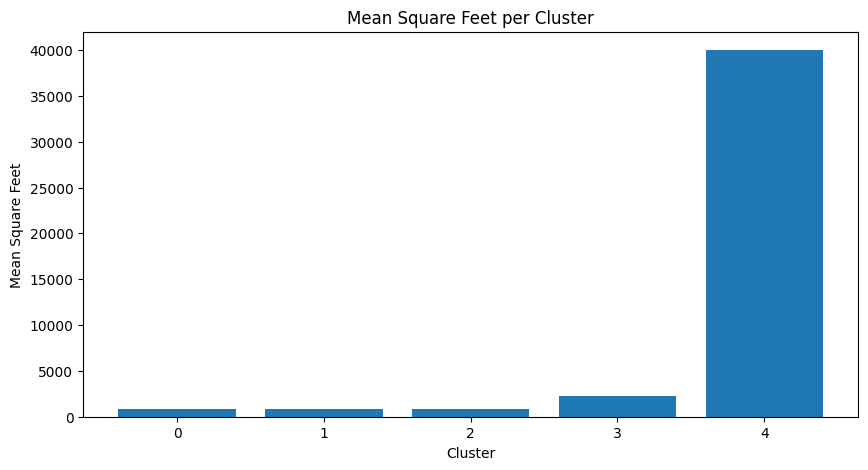

In [ ]:

# Create a bar plot for Mean Price by Cluster
plt.figure(figsize=(10, 5))
plt.bar(cluster_summary['Cluster'], cluster_summary['Mean Price'])
plt.xlabel('Cluster')
plt.ylabel('Mean Price')
plt.title('Mean Price per Cluster')
plt.show()

# Create a bar plot for Mean Square Feet by Cluster
plt.figure(figsize=(10, 5))
plt.bar(cluster_summary['Cluster'], cluster_summary['Mean Square Feet'])
plt.xlabel('Cluster')
plt.ylabel('Mean Square Feet')
plt.title('Mean Square Feet per Cluster')
plt.show()

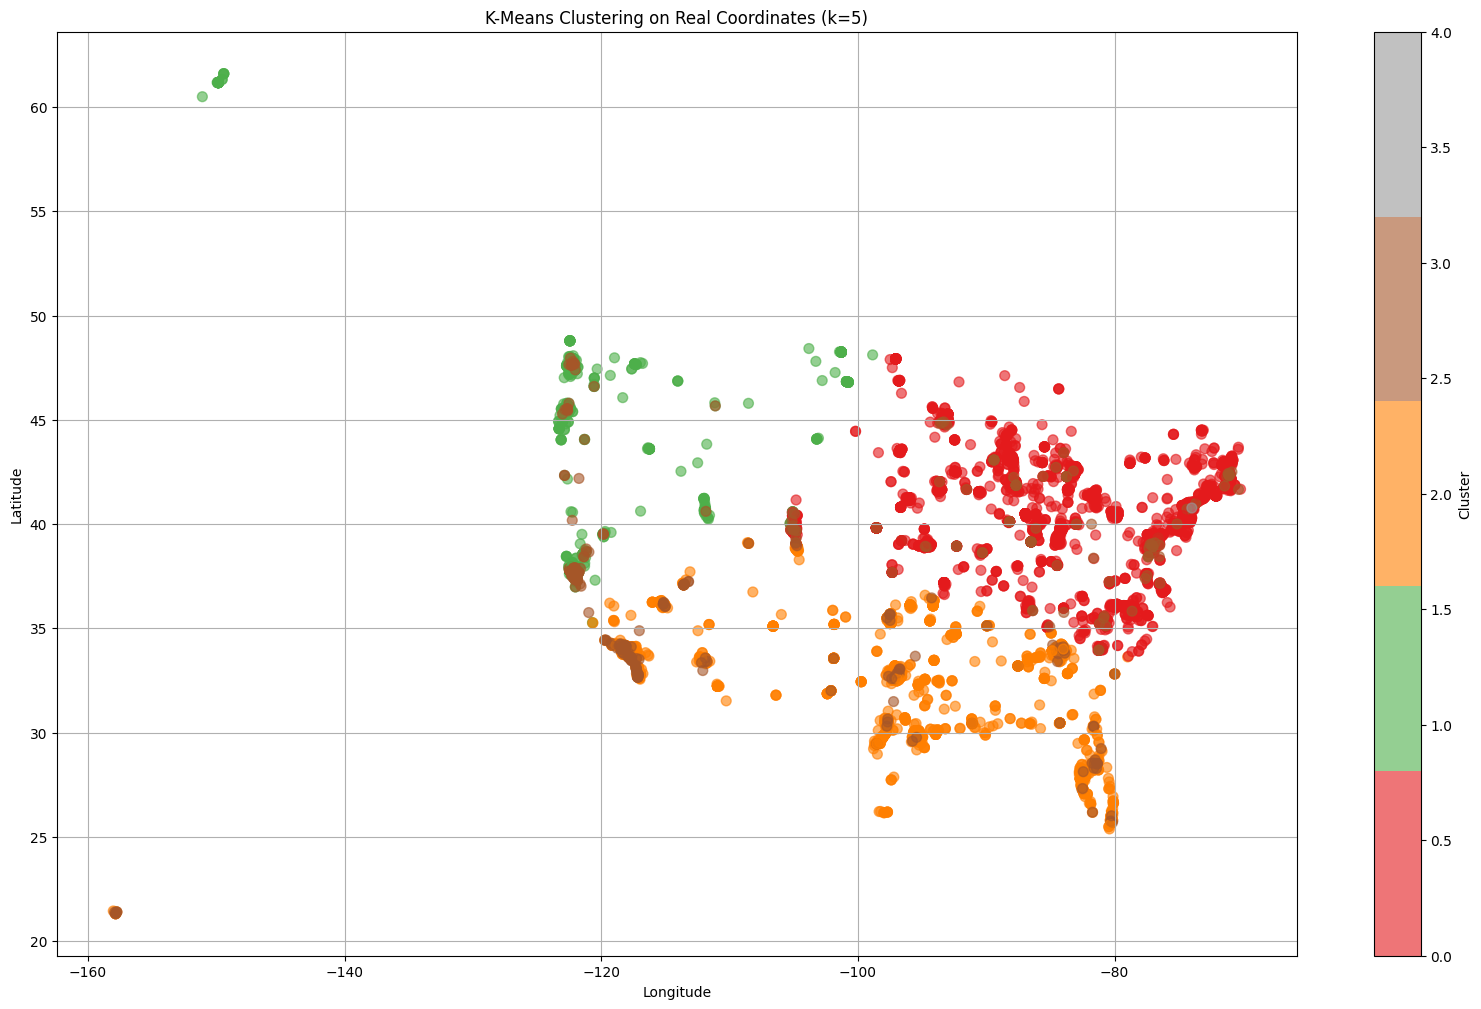

In [ ]:
custom_palette = sns.color_palette("Set1", 5)


plt.figure(figsize=(20, 12))
scatter = plt.scatter(
    dropped_df['longitude'],
    dropped_df['latitude'],
    c=dropped_df['cluster_5'],
    cmap=plt.cm.get_cmap('Set1', 5),  # Limit the colormap to 5 clusters
    alpha=0.6,
    s=50
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering on Real Coordinates (k=5)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
pip install folium

In [ ]:
longlat.reset_index(inplace=True)

In [ ]:
dropped_df = dropped_df.merge(longlat[['cluster_5', 'region']], on='cluster_5', how='left')


In [ ]:
dropped_df.shape

(9990, 8)

In [ ]:
import folium
from folium.plugins import MarkerCluster

In [ ]:
# Create a base map centered on the continental U.S.
map_center = [39.8283, -98.5795]  # approximate center of the U.S.
m = folium.Map(location=map_center, zoom_start=4, tiles='CartoDB positron')

# Set up a color palette for 5 clusters
colors = ['red', 'blue', 'green', 'purple', 'orange']
cluster_color_map = {i: colors[i] for i in range(5)}

# Create a marker cluster to group nearby markers
marker_cluster = MarkerCluster().add_to(m)

# Add markers for listings
for _, row in dropped_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=cluster_color_map[row['cluster_5']], # Use 'cluster_5' column
        fill=True,
        fill_opacity=0.7,
        popup=(
            f"Region: {row['region']}<br>"
            f"Price: ${row['price']}<br>"
            f"Size: {row['square_feet']} sqft"
        )
    ).add_to(marker_cluster)

# Save and show the map
m.save("/tmp/kmeans_cluster_map.html")
"/tmp/kmeans_cluster_map.html"

'/tmp/kmeans_cluster_map.html'

In [ ]:
from IPython.display import IFrame

IFrame(src="/tmp/kmeans_cluster_map.html", width=800, height=600)

In [ ]:
import webbrowser
webbrowser.open("/tmp/kmeans_cluster_map.html")

False

In [ ]:
dbscan_df = pd.read_csv('/content/apartments_for_rent_classified_10K 2.csv',sep=';', encoding='cp1252')

In [ ]:
dbscan_df= dbscan_df[["latitude","longitude"]].dropna()

In [ ]:
dbscan_df.shape

(9990, 2)

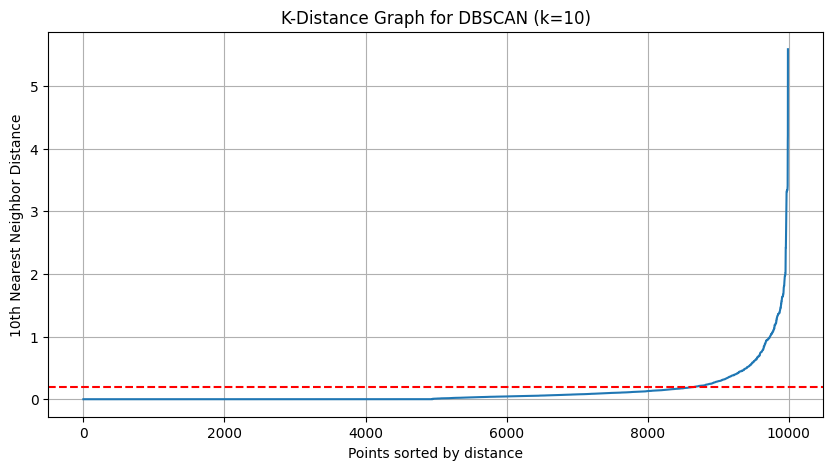

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Fit NearestNeighbors to get distances to the 10th nearest neighbor
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(dbscan_df)
distances, indices = neighbors_fit.kneighbors(dbscan_df)

# Sort distances to the 10th nearest neighbor
k_distances = np.sort(distances[:, 9])  # 10th neighbor distance

# Plot k-distance graph
plt.figure(figsize=(10, 5))
plt.plot(k_distances)
plt.axline([10, 0.2], [1000, 0.2], color='red', linestyle='--')
plt.xlabel("Points sorted by distance")
plt.ylabel("10th Nearest Neighbor Distance")
plt.title("K-Distance Graph for DBSCAN (k=10)")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# Step 3: Run DBSCAN with chosen parameters
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan_labels = dbscan.fit_predict(dbscan_df)

# Add labels to the original geospatial data
dbscan_df['dbscan_cluster'] = dbscan_labels

# Count number of clusters (excluding noise)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

# Display result summary
geo_summary = {
    'Number of Clusters': n_clusters,
    'Number of Noise Points': n_noise
}



In [ ]:
dbscan_df["dbscan_cluster"].unique()

array([  0,  -1,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  59,  42,  43,  44,  45,  46,  47,  48,  49,
        58,  50,  51,  52,  53,  54,  55,  56,  57,  60,  61,  62,  63,
        64,  65, 106,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  93,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105])

In [ ]:
geo_summary

{'Number of Clusters': 107, 'Number of Noise Points': 1046}

In [ ]:
dbscan_df = dbscan_df[dbscan_df['dbscan_cluster'] != -1]


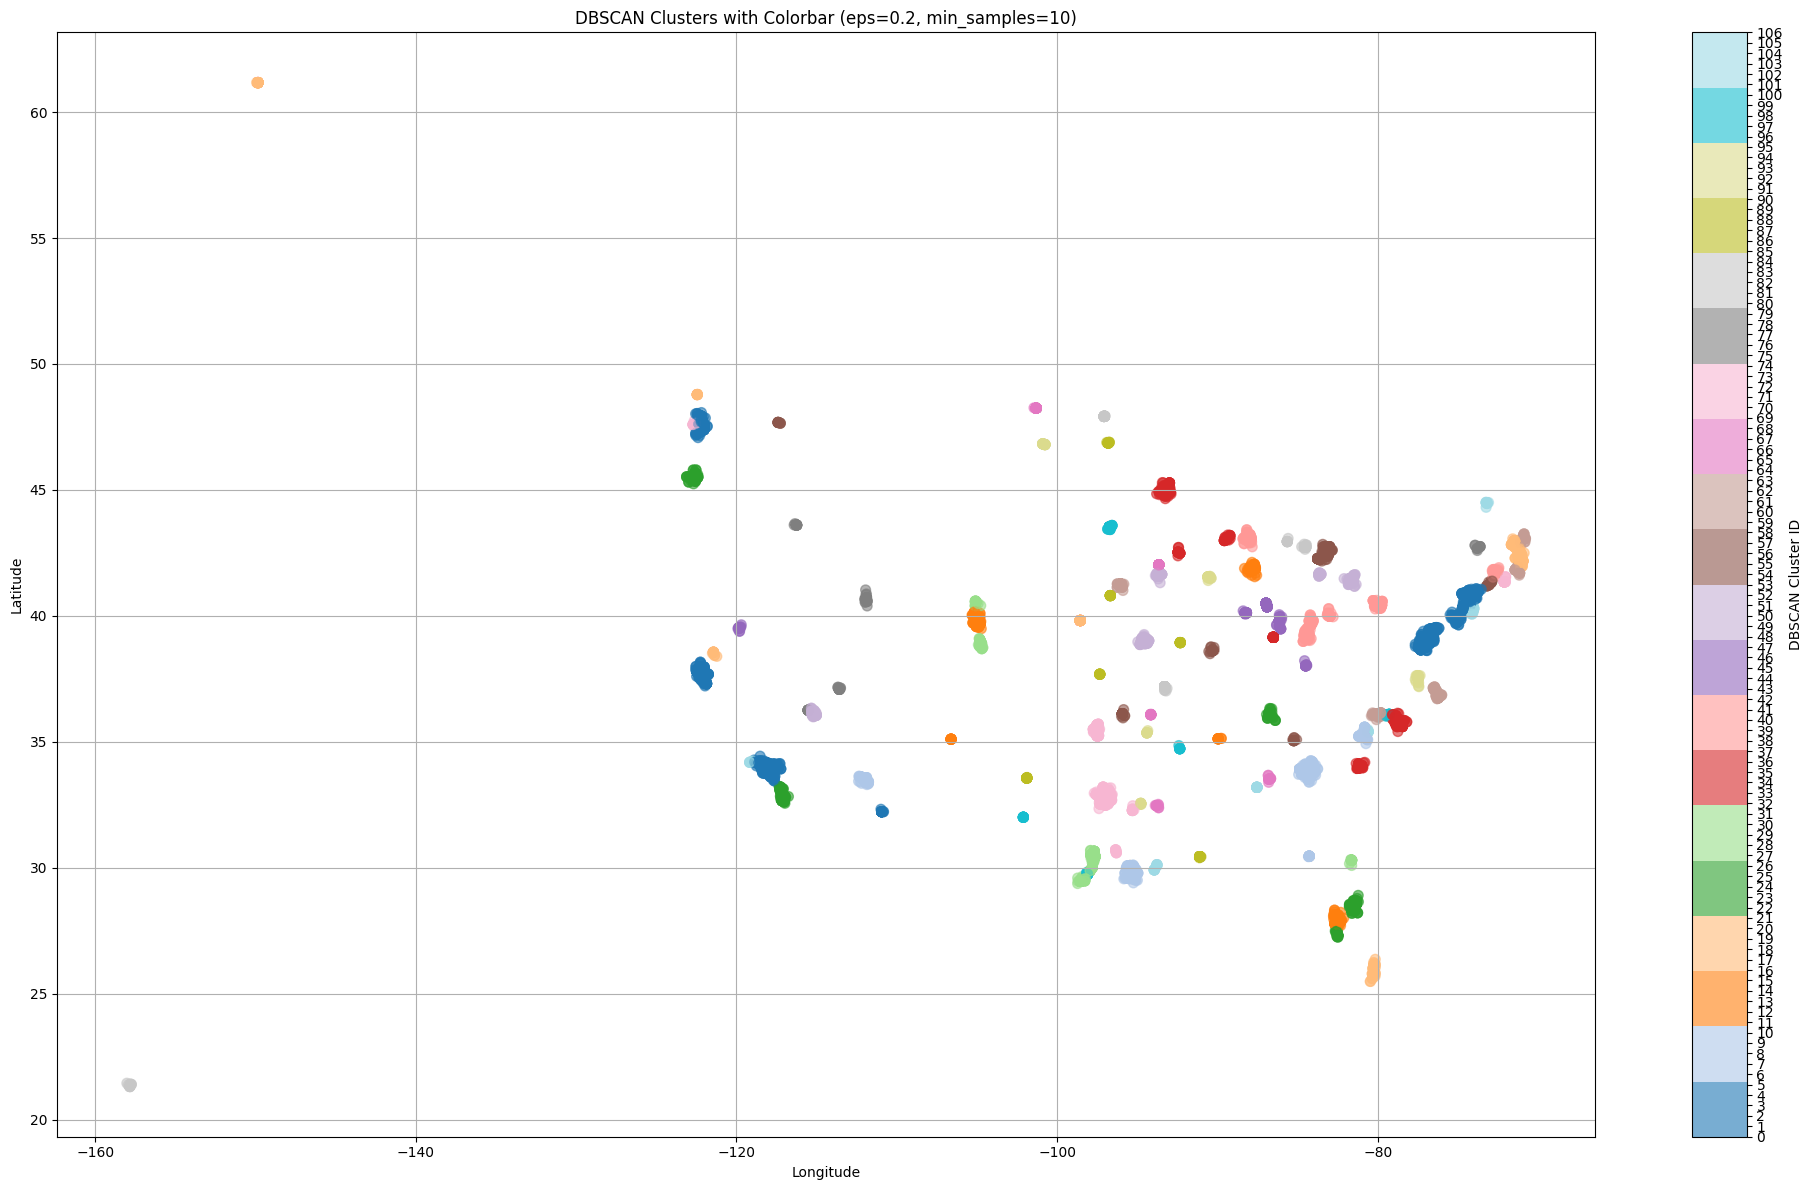

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Step 4 with colorbar instead of legend
plt.figure(figsize=(20, 12))

# Convert cluster labels to numeric indices for colormap
labels = dbscan_df['dbscan_cluster'].values
unique_labels = np.unique(labels)
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
numeric_labels = np.array([label_to_index[label] for label in labels])

# Create scatter plot
sc = plt.scatter(
    dbscan_df['longitude'],
    dbscan_df['latitude'],
    c=numeric_labels,
    cmap='tab20',
    s=50,
    alpha=0.6
)

# Create colorbar with custom tick labels
cbar = plt.colorbar(sc, ticks=np.arange(len(unique_labels)))
cbar.ax.set_yticklabels([str(label) for label in unique_labels])
cbar.set_label('DBSCAN Cluster ID')

plt.title("DBSCAN Clusters with Colorbar (eps=0.2, min_samples=10)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import folium
from folium.plugins import MarkerCluster

# Prepare a base map centered on the U.S.
map_center = [39.8283, -98.5795]
m = folium.Map(location=map_center, zoom_start=4, tiles='CartoDB positron')

# Assign colors using tab20 colormap for consistency with the scatter plot
# Use the recommended way to get the colormap
colormap = cm.get_cmap('tab20', len(unique_labels))
cluster_color_map = {
    label: mcolors.rgb2hex(colormap(idx)[:3])
    for label, idx in label_to_index.items()
}

# Create marker cluster group
marker_cluster = MarkerCluster().add_to(m)

# Add markers with colors based on DBSCAN cluster
for _, row in dbscan_df.iterrows():
    cluster_id = row['dbscan_cluster']
    color = cluster_color_map[cluster_id]
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Cluster: {cluster_id}"
    ).add_to(marker_cluster)

# Save the map to HTML
m.save("/tmp/dbscan_cluster_map.html")
"/tmp/dbscan_cluster_map.html"

<ipython-input-93-2468740412>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab20', len(unique_labels))


'/tmp/dbscan_cluster_map.html'

In [ ]:
from IPython.display import IFrame

IFrame(src="/tmp/dbscan_cluster_map.html", width=800, height=600)

In [ ]:
# Re-import required libraries after reset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Reload the uploaded CSV file
file_path = "/content/apartments_for_rent_classified_10K 2.csv"
df_cleaned = pd.read_csv(file_path, delimiter=';', encoding='ISO-8859-1')

# Prepare data for K-Means (standardized 4 features)
features = ['latitude', 'longitude', 'price', 'square_feet']
df_kmeans = df_cleaned[features].dropna().reset_index(drop=True)
scaler = StandardScaler()
X_kmeans = scaler.fit_transform(df_kmeans)

# Run KMeans (k=5 as before)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_kmeans)

# Evaluation Metrics for KMeans
kmeans_silhouette = silhouette_score(X_kmeans, kmeans_labels)
kmeans_davies = davies_bouldin_score(X_kmeans, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(X_kmeans, kmeans_labels)

# Prepare data for DBSCAN (lat/lon only)
geo_df = df_cleaned[['latitude', 'longitude']].dropna().reset_index(drop=True)
geo_X = geo_df[['latitude', 'longitude']].values
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan_labels = dbscan.fit_predict(geo_X)

# Filter out noise for evaluation
mask = dbscan_labels != -1
if len(np.unique(dbscan_labels[mask])) > 1:
    dbscan_silhouette = silhouette_score(geo_X[mask], dbscan_labels[mask])
    dbscan_davies = davies_bouldin_score(geo_X[mask], dbscan_labels[mask])
    dbscan_calinski = calinski_harabasz_score(geo_X[mask], dbscan_labels[mask])
else:
    dbscan_silhouette = dbscan_davies = dbscan_calinski = None

# Compile results into DataFrame
evaluation_results = {
    "Metric": ["Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Score"],
    "K-Means": [kmeans_silhouette, kmeans_davies, kmeans_calinski],
    "DBSCAN (filtered)": [dbscan_silhouette, dbscan_davies, dbscan_calinski]
}
eval_df = pd.DataFrame(evaluation_results)



In [ ]:
eval_df

,Metric,K-Means,DBSCAN (filtered)
0,Silhouette Score,0.336761,0.753930
1,Davies-Bouldin Index,0.877389,0.211837
2,Calinski-Harabasz Score,2925.124688,418733.482773


In [ ]:

# Load dataset
file_path = "/content/apartments_for_rent_classified_10K 2.csv"
df_cleaned = pd.read_csv(file_path, delimiter=';', encoding='ISO-8859-1')

# Select and clean data
features = ['latitude', 'longitude', 'price', 'square_feet']
df_dbscan = df_cleaned[features].dropna().reset_index(drop=True)

# Run DBSCAN on latitude and longitude
dbscan = DBSCAN(eps=0.2, min_samples=10)
df_dbscan['dbscan_cluster'] = dbscan.fit_predict(df_dbscan[['latitude', 'longitude']])

# Filter out noise
df_dbscan_filtered = df_dbscan[df_dbscan['dbscan_cluster'] != -1]

# Define region labeling function
def label_region(lat, lon):
    if lat > 35 and lon < -100:
        return "West Coast"
    elif lat > 35 and lon > -100 and lon < -80:
        return "Midwest"
    elif lat > 35 and lon > -80:
        return "Northeast"
    elif lat <= 35 and lon < -90:
        return "Southwest"
    else:
        return "Southeast"

# Assign region labels to DBSCAN clusters
cluster_centers = df_dbscan_filtered.groupby('dbscan_cluster')[['latitude', 'longitude']].mean().reset_index()
cluster_centers['region'] = cluster_centers.apply(lambda x: label_region(x['latitude'], x['longitude']), axis=1)

# Merge region labels
df_dbscan_filtered = df_dbscan_filtered.merge(
    cluster_centers[['dbscan_cluster', 'region']], on='dbscan_cluster', how='left'
)

# Compute interpretability summary
dbscan_summary = df_dbscan_filtered.groupby('dbscan_cluster').agg({
    'price': ['mean', 'median', 'min', 'max'],
    'square_feet': ['mean', 'median', 'min', 'max'],
    'latitude': 'mean',
    'longitude': 'mean',
    'region': 'first',
    'dbscan_cluster': 'count'
}).rename(columns={'dbscan_cluster': 'count'})

# Flatten columns
dbscan_summary.columns = ['_'.join(col).strip() for col in dbscan_summary.columns.values]


In [ ]:
dbscan_summary

,price_mean,price_median,price_min,price_max,square_feet_mean,square_feet_median,square_feet_min,square_feet_max,latitude_mean,longitude_mean,region_first,count_count
dbscan_cluster,,,,,,,,,,,,
0,1681.769504,1570.0,200,11000,879.195035,807.0,101,11318,39.075960,-76.908710,Northeast,564
1,1859.011416,1705.5,925,9395,911.547945,820.0,116,3820,47.605104,-122.223625,West Coast,438
2,1969.212190,1800.0,675,5000,984.304740,846.0,130,40000,40.467271,-74.508921,Northeast,443
3,2608.456238,2220.0,750,19500,927.828678,800.0,132,5000,33.990362,-118.194333,Southwest,537
4,3273.564854,3000.0,930,9500,897.020921,700.0,138,4555,37.712226,-122.249438,West Coast,239
...,...,...,...,...,...,...,...,...,...,...,...,...
102,1882.666667,1850.0,1290,2605,941.133333,850.0,648,1250,40.226313,-74.060720,Northeast,15
103,2807.000000,1958.5,1650,7500,1284.500000,919.0,723,3331,34.201500,-119.119100,Southwest,6
104,1610.416667,1625.0,1100,2200,1073.500000,962.5,760,2170,44.472092,-73.202167,Northeast,12


<ipython-input-99-3013697602>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(plot_df.index.astype(str), rotation=45, ha='right')
<ipython-input-99-3013697602>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(plot_df.index.astype(str), rotation=45, ha='right')


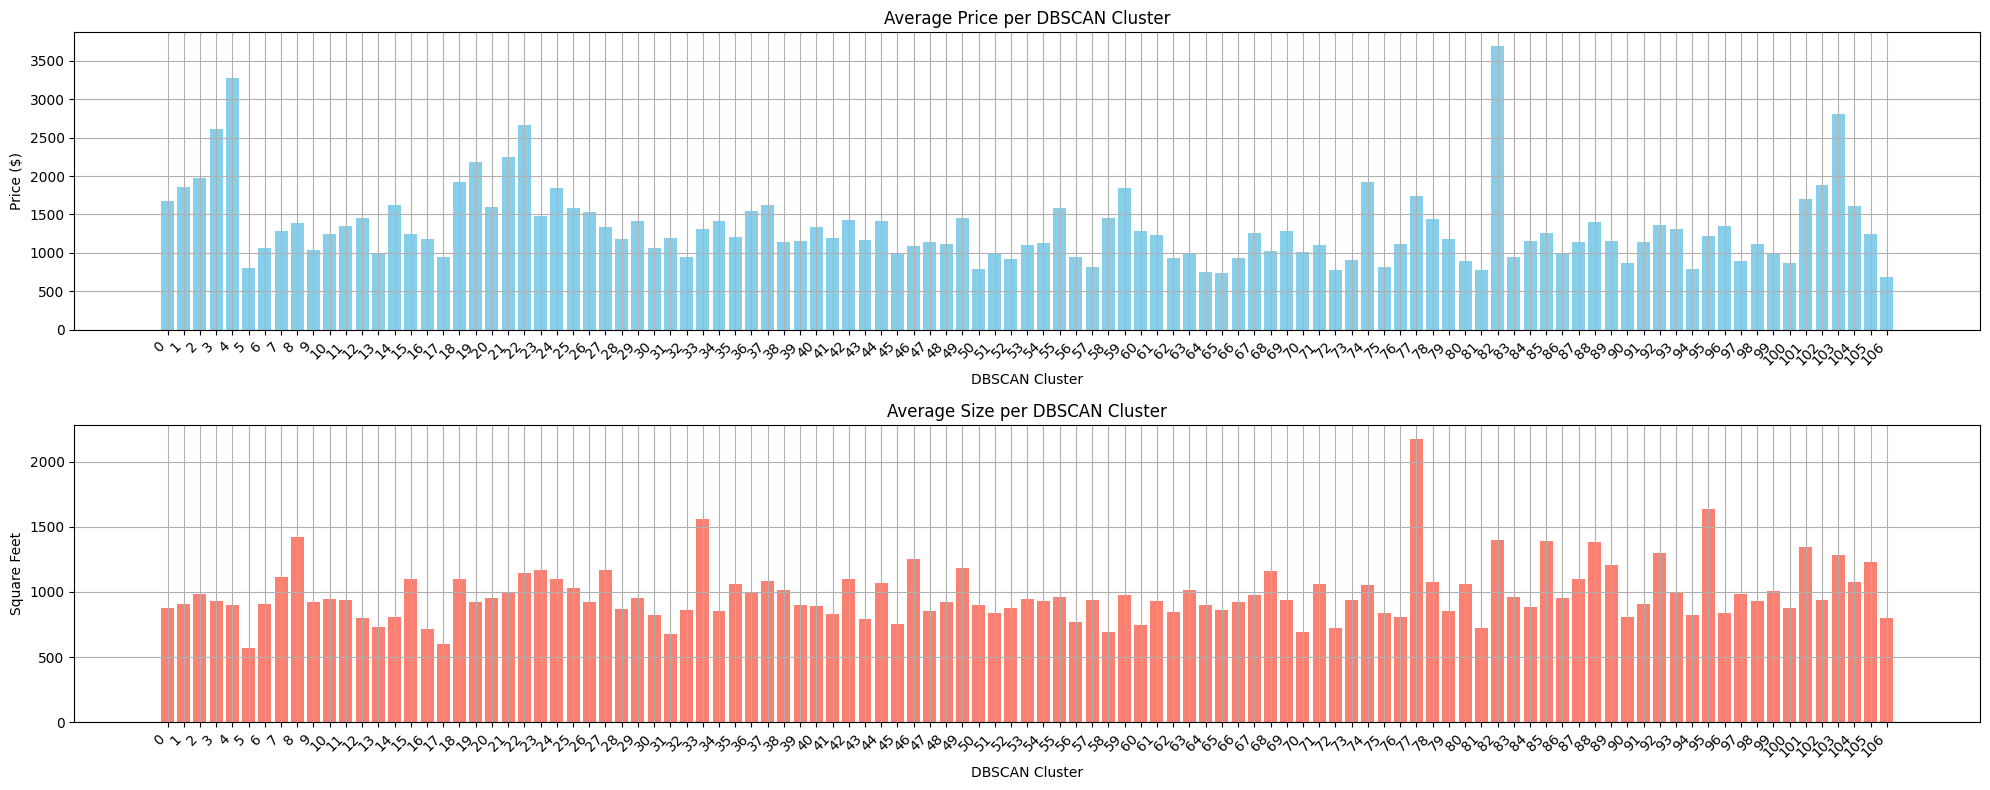

In [ ]:
 # Aggregate key metrics for visualization
plot_df = dbscan_summary[['price_mean', 'square_feet_mean']]
plot_df = plot_df.rename(columns={
    'price_mean': 'Average Price',
    'square_feet_mean': 'Average Square Footage'
})

# Plotting bar plots
fig, axs = plt.subplots(2, 1, figsize=(20,8))

# Average Price Plot
axs[0].bar(plot_df.index.astype(str), plot_df['Average Price'], color='skyblue')
axs[0].set_title('Average Price per DBSCAN Cluster')
axs[0].set_xlabel('DBSCAN Cluster')
axs[0].set_ylabel('Price ($)')
axs[0].set_xticklabels(plot_df.index.astype(str), rotation=45, ha='right')
axs[0].grid(True)

# Average Size Plot
axs[1].bar(plot_df.index.astype(str), plot_df['Average Square Footage'], color='salmon')
axs[1].set_title('Average Size per DBSCAN Cluster')
axs[1].set_xlabel('DBSCAN Cluster')
axs[1].set_ylabel('Square Feet')
axs[1].set_xticklabels(plot_df.index.astype(str), rotation=45, ha='right')
axs[1].grid(True)

plt.tight_layout()
plt.show()